In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics.em import TDEMOccamModelling, TDEMBlockModelling

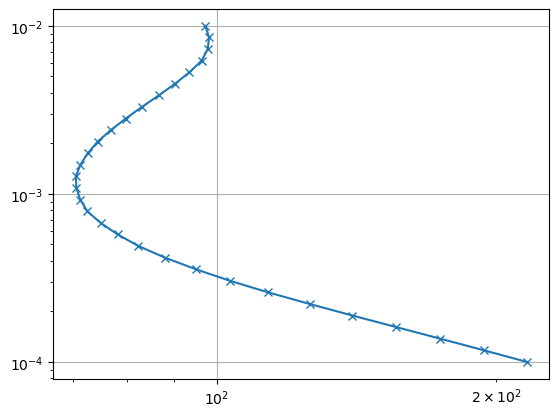

In [3]:
t = np.logspace(-4, -2, 30)
fopkw = dict(times=t, txArea=100**2)
synth = [100, 100, 300, 30, 300]
fopSynth = TDEMBlockModelling(nLayers=(len(synth)+1)//2, **fopkw)
data = fopSynth(synth)
plt.loglog(data, t, "x-")
plt.grid()

In [4]:
thk = np.logspace(0.5, 2, 20)
print(sum(thk))
fop = TDEMOccamModelling(thk=thk, **fopkw)
inv = pg.Inversion(fop=fop)
inv.dataTrans = pg.trans.TransLog()
inv.modelTrans = pg.trans.TransLog()
model = inv.run(data, relativeError=0.03, verbose=True)

24/07/24 - 13:20:39 - pyGIMLi - INFO - Found 1 regions.
24/07/24 - 13:20:39 - pyGIMLi - INFO - Use median(data values)=89.00823270181948


24/07/24 - 13:20:39 - pyGIMLi - INFO - Created startmodel from forward operator: 21, min/max=89.008233/89.008233


585.7577398452621




In [5]:
print(inv.chi2History)

[102.38770253269685, 62.11218774519319, 28.674463699890143, 8.564669568661714, 0.3196175032578783]


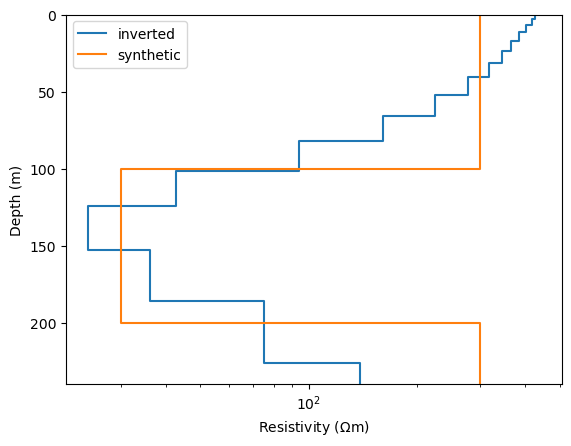

In [14]:
fig, ax = plt.subplots()
pg.viewer.mpl.drawModel1D(ax, plot="semilogx", thickness=thk, values=model, label="inverted")
pg.viewer.mpl.drawModel1D(ax, model=synth, label="synthetic")
ax.grid()
ax.legend();